In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

#print options to data exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [2]:
#everyone can set their own while working. Personally I leave this blank because relative works for me
personal_path = ''

In [3]:
path_covid = os.path.join(personal_path, "Data/full_new.csv")
df = pd.read_csv(path_covid)

In [4]:
df

,iso_code,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,daily_vaccinations,daily_vaccinations_per_million,daily_vaccinations_raw,Beta,Epsilon,Gamma,Kappa,Iota,Eta,Delta,Alpha,non_who,Lambda,Mu,Omicron
0,ABW,2021-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,2.0,0.0,0.0,9.0,102.0,0.0,0.0,0.0
1,ABW,2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.0,1.0,0.0,2.0,0.0,0.0,37.0,101.0,0.0,0.0,0.0
2,ABW,2021-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,15.0,0.0,0.0,7.0,0.0,0.0,65.0,36.0,0.0,0.0,0.0
3,ABW,2021-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0,1.0,0.0,7.0,0.0,0.0,66.0,11.0,0.0,0.0,0.0
4,ABW,2021-03-29,North America,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25766.0,15600.0,10166.0,NaN,NaN,NaN,24.04,14.55,9.48,NaN,NaN,NaN,NaN,67.59,107195.0,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139156,ZWE,2021-11-30,Africa,Zimbabwe,134625.0,399.0,135.857,4707.0,1.0,1.143,8920.188,26.438,9.002,311.884,0.066,0.076,3.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4679.0,1457863.0,96.597,0.310,2974.0,0.197,0.046,21.9,tests performed,6611942.0,3795401.0,2816541.0,NaN

In [5]:
df['new_cases_per_million'].isna().sum()/len(df['new_cases_per_million'])

0.06943037201514793

In [6]:
df['Beta'].isna().sum()/len(df)

0.983285546956403

In [48]:
13/14

0.9285714285714286

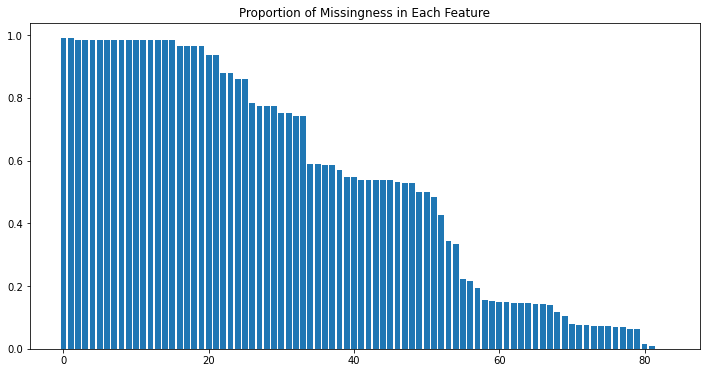

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(x=np.arange(0, len(df.columns)), height = np.sort(df.isna().sum() / len(df))[::-1])
plt.title('Proportion of Missingness in Each Feature')
plt.show()

In [8]:
df = df.loc[:, df.isna().sum() / len(df) < 0.65]
df.columns

Index(['iso_code', 'date', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
     

In [49]:
df_sub = df[['new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred','daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred', 'daily_vaccinations',
       'daily_vaccinations_per_million']]
y = df[['new_cases_per_million']] #this is the field we want to predict

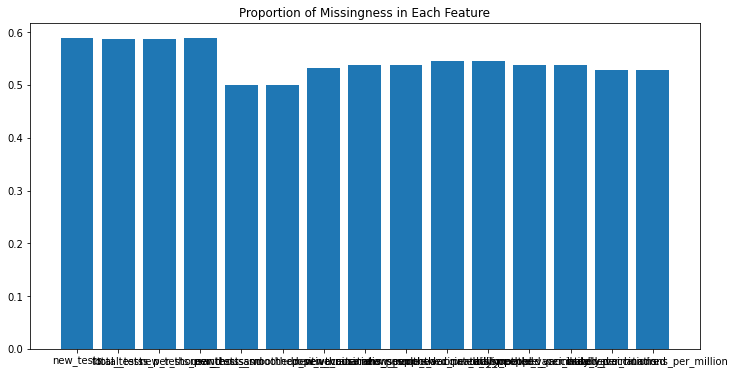

In [50]:
plt.figure(figsize=(12, 6))
plt.bar(x=df_sub.columns, height = df_sub.isna().sum() / len(df_sub))
plt.title('Proportion of Missingness in Each Feature')
plt.show()

In [51]:
y_np = y.to_numpy()

In [52]:
len(y_np)

139161

In [59]:
train_X, validtest_X, train_y, validtest_y = train_test_split(df_sub, y_np, train_size = 0.8, random_state = 42, shuffle=False)
valid_X, test_X, valid_y, test_y = train_test_split(validtest_X, validtest_y, train_size = 0.5, random_state = 42, shuffle=False)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [61]:
#df.to_csv('df_name.csv', header=None,index=False)



imputer_split = IterativeImputer(estimator = BayesianRidge(), max_iter = 20, min_value = df_sub.min(axis=0), max_value = df_sub.max(axis=0), random_state=42)
train_X_imputed = pd.DataFrame(imputer_split.fit_transform(train_X))
valid_X_imputed = pd.DataFrame(imputer_split.transform(valid_X))
test_X_imputed = pd.DataFrame(imputer_split.transform(test_X))
# is it ok to impute on test with train  data
# use an easy imputer
train_y_imputed = pd.DataFrame(imputer_split.fit_transform(train_y))
valid_y_imputed = pd.DataFrame(imputer_split.transform(valid_y))
test_y_imputed = pd.DataFrame(imputer_split.transform(test_y))

/home/neha/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [63]:
def make_time_stepped(X,y):
    X_new = []
    y_new = []
    for i in range(math.floor(len(y) / 5)):
        if len(y[5*i:5*i + 5]) == 5:
            y_new.append(y[5*i:5*i + 5].sum()) #delta cases
            X_new.append(X[5*i:5*i + 5])
    return X_new, y_new

In [64]:
train_X_timed, train_y_timed = make_time_stepped(train_X_imputed, train_y_imputed)
valid_X_timed, valid_y_timed = make_time_stepped(valid_X_imputed, valid_y_imputed)
test_X_timed, test_y_timed = make_time_stepped(test_X_imputed, test_y_imputed)

In [33]:
len(train_X_)

ValueError: could not convert string to float: 'tests performed'